In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")


In [17]:

df = pd.read_csv("../data/college_placement_1000.csv")
df.head()

,student_id,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,domain,skills,placed
0,S1000,7.70,3,4,2,6,6,7,Web Development,"HTML, CSS, JavaScript",1
1,S1001,7.19,1,4,1,7,10,8,Cyber Security,"Linux, Security Tools, Scripting",1
2,S1002,7.82,0,2,2,8,5,8,Cloud Computing,"GCP, Terraform, CI/CD",0
3,S1003,8.52,0,1,0,7,4,6,Data Science,"Python, SQL, Power BI",0
4,S1004,7.11,1,4,0,5,9,5,Web Development,"HTML, CSS, JavaScript",1


In [18]:

df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           1000 non-null   object 
 1   cgpa                 1000 non-null   float64
 2   internships          1000 non-null   int64  
 3   projects             1000 non-null   int64  
 4   certifications       1000 non-null   int64  
 5   communication_score  1000 non-null   int64  
 6   aptitude_score       1000 non-null   int64  
 7   technical_score      1000 non-null   int64  
 8   domain               1000 non-null   object 
 9   skills               1000 non-null   object 
 10  placed               1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,placed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.315470,1.019000,2.847000,1.819000,7.028000,6.725000,7.235000,0.491000
std,0.781111,1.056293,1.225191,1.241685,1.493803,1.438556,1.278049,0.500169
min,5.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000
25%,6.780000,0.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.000000
50%,7.320000,1.000000,3.000000,2.000000,7.000000,7.000000,7.000000,0.000000
75%,7.820000,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,1.000000
max,10.000000,3.000000,5.000000,4.000000,10.000000,10.000000,10.000000,1.000000


In [19]:

df.isnull().sum()


student_id             0
cgpa                   0
internships            0
projects               0
certifications         0
communication_score    0
aptitude_score         0
technical_score        0
domain                 0
skills                 0
placed                 0
dtype: int64

In [20]:

df.nunique()


student_id             1000
cgpa                    321
internships               4
projects                  5
certifications            5
communication_score       8
aptitude_score            9
technical_score           8
domain                    7
skills                   28
placed                    2
dtype: int64

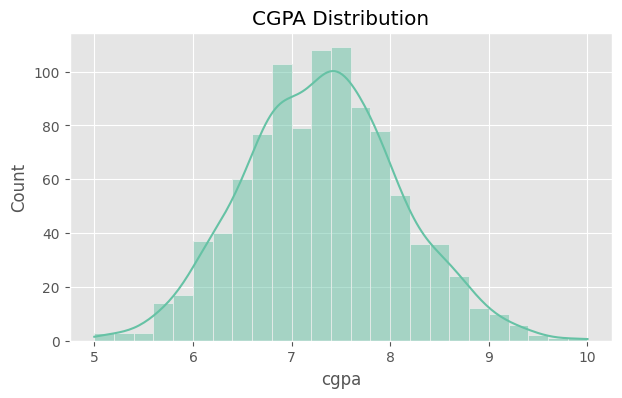

In [21]:

plt.figure(figsize=(7,4))
sns.histplot(df["cgpa"], kde=True)
plt.title("CGPA Distribution")
plt.show()


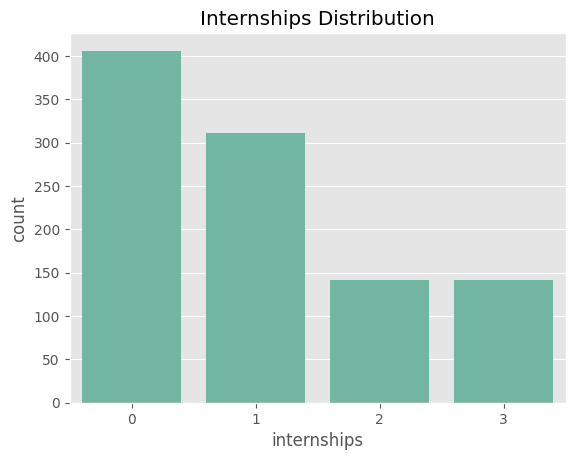

In [22]:

sns.countplot(data=df, x="internships")
plt.title("Internships Distribution")
plt.show()


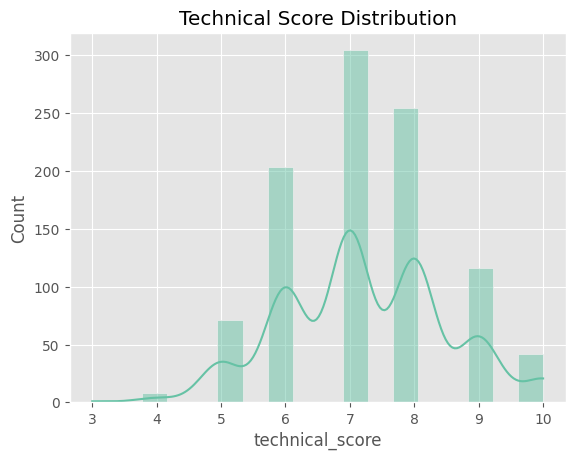

In [23]:

sns.histplot(df["technical_score"], kde=True)
plt.title("Technical Score Distribution")
plt.show()


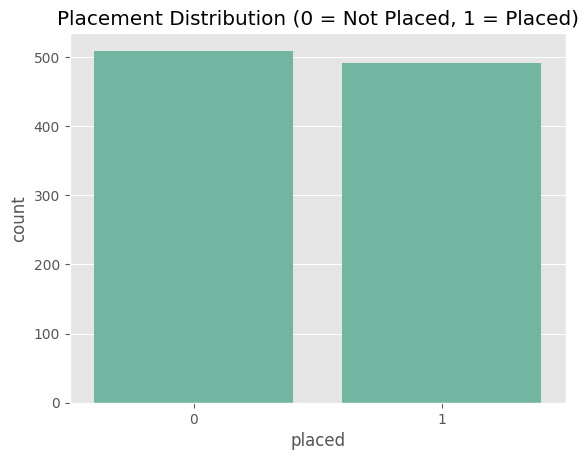

In [24]:

sns.countplot(data=df, x="placed")
plt.title("Placement Distribution (0 = Not Placed, 1 = Placed)")
plt.show()


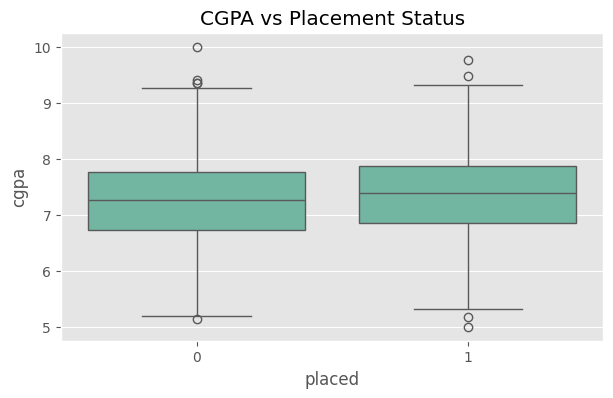

In [25]:

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="placed", y="cgpa")
plt.title("CGPA vs Placement Status")
plt.show()


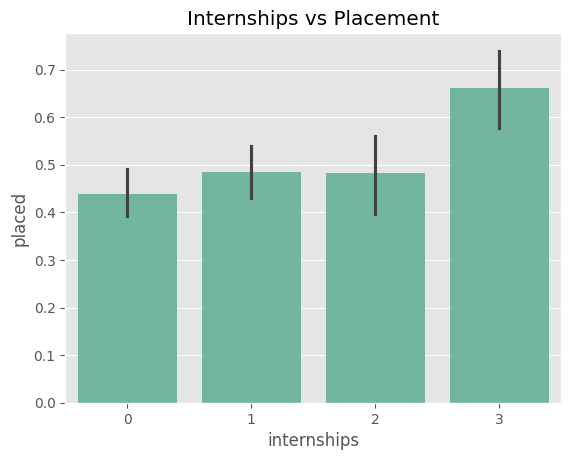

In [26]:

sns.barplot(x="internships", y="placed", data=df)
plt.title("Internships vs Placement")
plt.show()


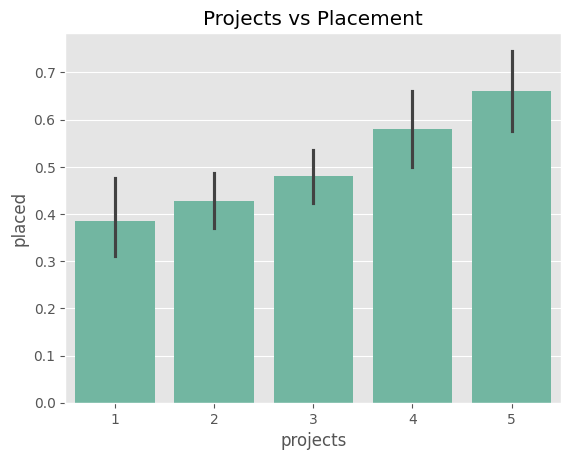

In [27]:

sns.barplot(x="projects", y="placed", data=df)
plt.title("Projects vs Placement")
plt.show()


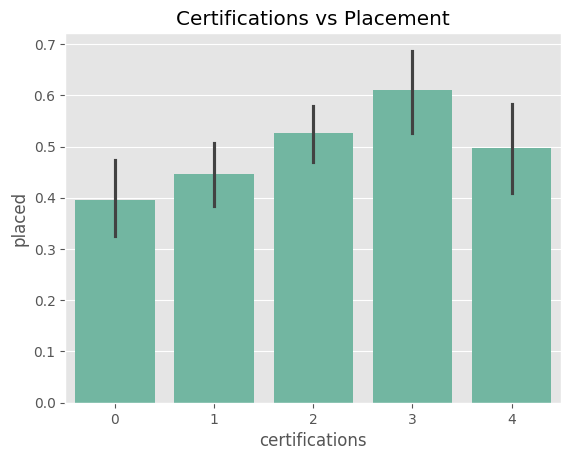

In [28]:

sns.barplot(x="certifications", y="placed", data=df)
plt.title("Certifications vs Placement")
plt.show()


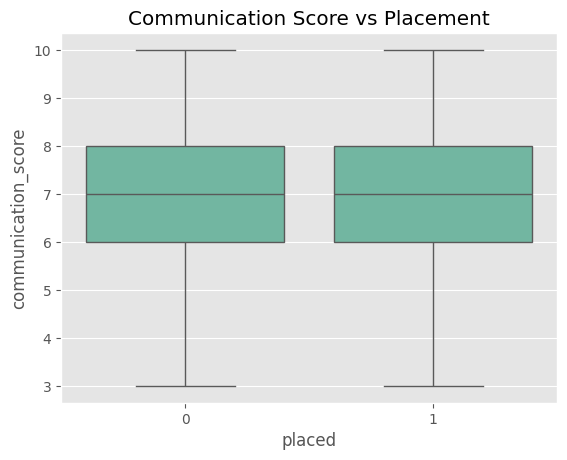

In [29]:

sns.boxplot(x="placed", y="communication_score", data=df)
plt.title("Communication Score vs Placement")
plt.show()


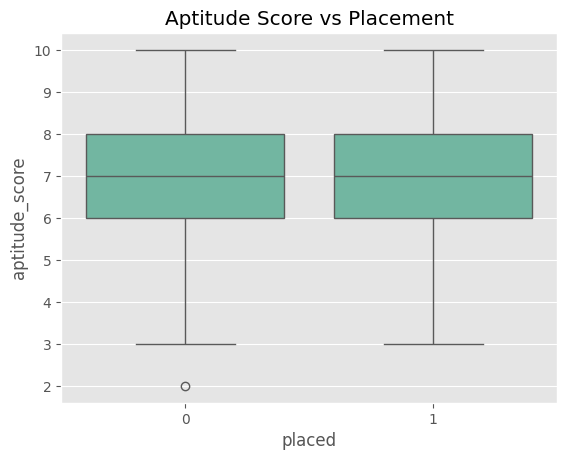

In [30]:

sns.boxplot(x="placed", y="aptitude_score", data=df)
plt.title("Aptitude Score vs Placement")
plt.show()


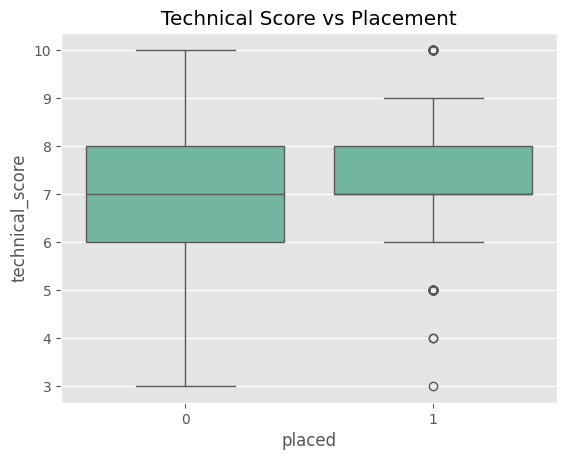

In [31]:

sns.boxplot(x="placed", y="technical_score", data=df)
plt.title("Technical Score vs Placement")
plt.show()


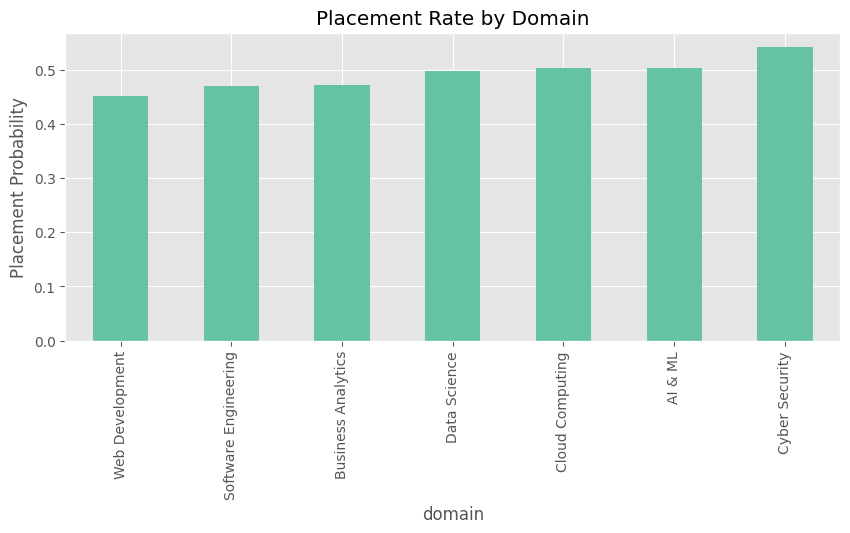

In [32]:

domain_placement = df.groupby("domain")["placed"].mean().sort_values()

plt.figure(figsize=(10,4))
domain_placement.plot(kind="bar")
plt.title("Placement Rate by Domain")
plt.ylabel("Placement Probability")
plt.show()


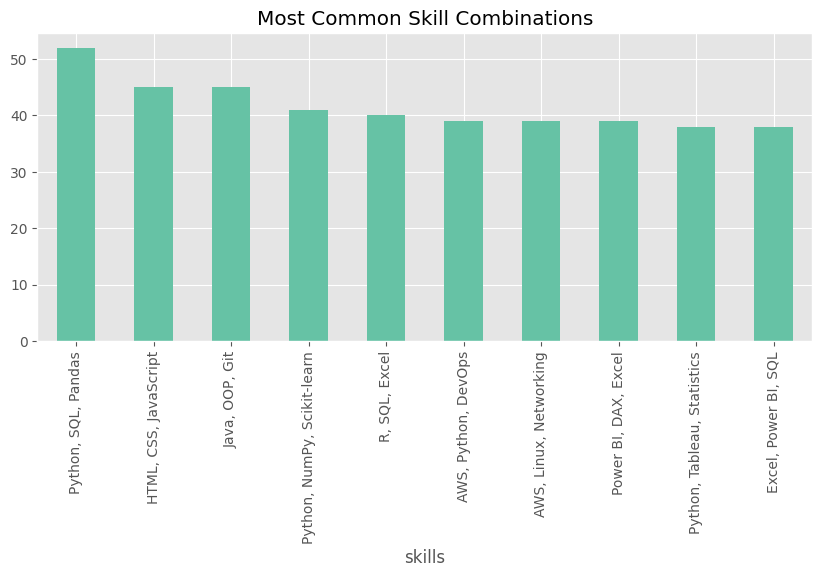

In [33]:

df["skills"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Most Common Skill Combinations")
plt.show()


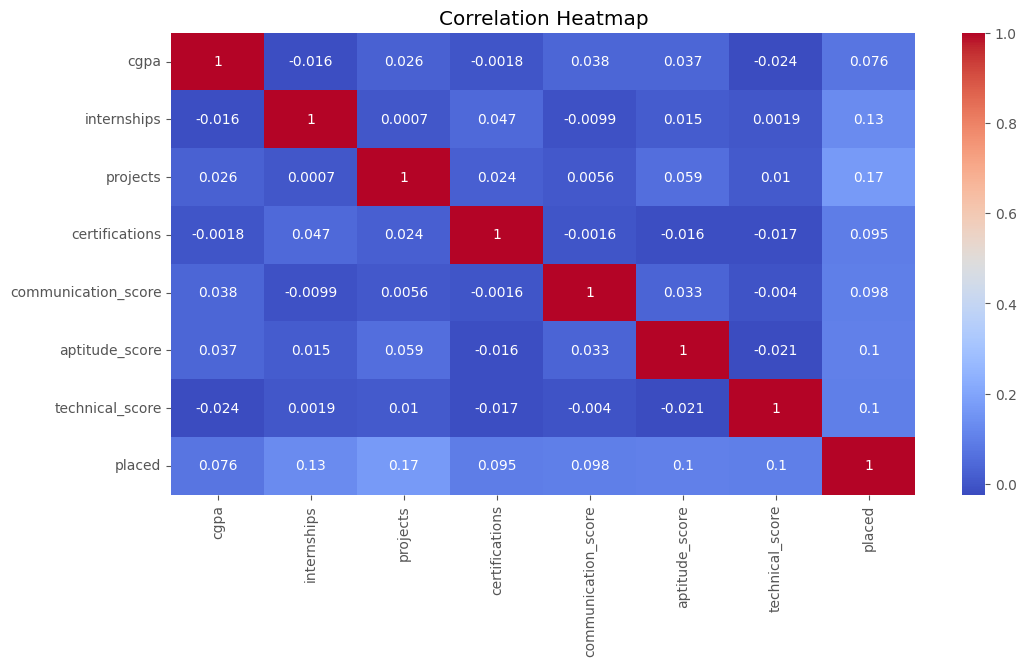

In [34]:

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [35]:

print("Average CGPA of Placed Students:", df[df.placed==1]["cgpa"].mean())
print("Average CGPA of Not Placed Students:", df[df.placed==0]["cgpa"].mean())

print("\nTop Domains with Highest Placement Probability:")
print(domain_placement.sort_values(ascending=False).head())


Average CGPA of Placed Students: 7.375498981670061
Average CGPA of Not Placed Students: 7.257563850687624

Top Domains with Highest Placement Probability:
domain
Cyber Security        0.541353
AI & ML               0.503817
Cloud Computing       0.503356
Data Science          0.497006
Business Analytics    0.471429
Name: placed, dtype: float64


In [36]:
df.to_csv("../data/cleaned_placement_data.csv", index=False)